# QAE
This notebook contains QAE tests in Qiskit inspired by [Romero et al](https://arxiv.org/pdf/1612.02806.pdf) and [Sim et al](https://arxiv.org/pdf/1810.10576.pdf).\
Developed by Filip Igic for his FYP.

In [20]:
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi
import matplotlib.pyplot as mpl
import numpy as np

## Parameter Scan Test

Theta: -3.141592653589793	 Loss: 0
Theta: -2.9249310912732556	 Loss: -0.004638671875
Theta: -2.708269528956718	 Loss: -0.0224609375
Theta: -2.4916079666401805	 Loss: -0.064453125
Theta: -2.2749464043236434	 Loss: -0.11181640625
Theta: -2.058284842007106	 Loss: -0.16650390625
Theta: -1.8416232796905683	 Loss: -0.24267578125
Theta: -1.624961717374031	 Loss: -0.3583984375
Theta: -1.4083001550574934	 Loss: -0.449462890625
Theta: -1.1916385927409558	 Loss: -0.586181640625
Theta: -0.9749770304244185	 Loss: -0.703369140625
Theta: -0.758315468107881	 Loss: -0.790771484375
Theta: -0.5416539057913434	 Loss: -0.89208984375
Theta: -0.3249923434748059	 Loss: -0.95703125
Theta: -0.10833078115826877	 Loss: -0.99365234375
Theta: 0.10833078115826877	 Loss: -0.994384765625
Theta: 0.3249923434748063	 Loss: -0.960693359375
Theta: 0.5416539057913439	 Loss: -0.9013671875
Theta: 0.7583154681078814	 Loss: -0.79541015625
Theta: 0.9749770304244185	 Loss: -0.69775390625
Theta: 1.191638592740956	 Loss: -0.5629882

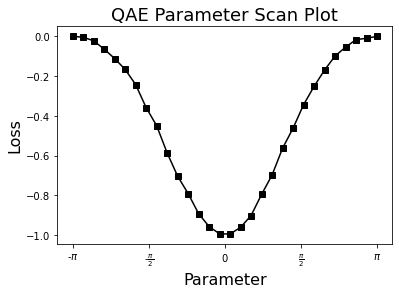

In [2]:
angles = np.linspace(-pi, pi, 30)
losses = []

for theta in angles:
    qc = QuantumCircuit(2)

    qc.ry(pi/4, 0)
    qc.cx(0,1)

    qc.barrier()

    qc.ry(theta, 1)
    qc.cx(0,1)

    inverse = qc.inverse()

    qc.barrier()

    qc.reset(1)

    qc.append(inverse, qc.qubits[:2])

    qc.measure_all()
    
    qasm_sim = Aer.get_backend('qasm_simulator')
    t_qc = transpile(qc, qasm_sim)
    qobj = assemble(t_qc, shots=4096)
    result = qasm_sim.run(qobj).result()
    counts = result.get_counts(qc)
    
    if '00' in counts:
        loss = counts['00']/4096
    else:
        loss = 0
    loss *= -1
    losses.append(loss)
    print("Theta: {}\t Loss: {}".format(theta, loss))

# Visualize loss landscape
fig = mpl.figure(figsize=(6, 4))
mpl.plot(angles, losses, 'ks-')
mpl.title("QAE Parameter Scan Plot", fontsize=18)
mpl.xlabel("Parameter", fontsize=16)
mpl.ylabel("Loss", fontsize=16)
mpl.xticks([-np.pi, -np.pi/2., 0., np.pi/2., np.pi],
           [r"-$\pi$", r"-$\frac{\pi}{2}$", "$0$", r"$\frac{\pi}{2}$", r"$\pi$"])
mpl.show()

## Minimisation Test

In [21]:
def f(x):
    qc = QuantumCircuit(2)

    qc.ry(pi/4, 0)
    qc.cx(0,1)

    qc.barrier()

    qc.ry(x[0], 1)
    qc.cx(0,1)

    inverse = qc.inverse()

    qc.barrier()

    qc.reset(1)

    qc.append(inverse, qc.qubits[:2])

    qc.measure_all()
    
    qasm_sim = Aer.get_backend('qasm_simulator')
    t_qc = transpile(qc, qasm_sim)
    qobj = assemble(t_qc, shots=4096)
    result = qasm_sim.run(qobj).result()
    counts = result.get_counts(qc)
    
    if '00' in counts:
        loss = counts['00']/4096
    else:
        loss = 0
    loss *= -1
    history.append(loss)
    return loss

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 2
         Function evaluations: 41


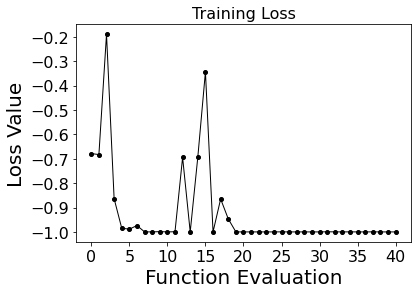

In [22]:
import scipy.optimize as sp

history=[]

result = sp.fmin_powell(f, 1.0)

fig = mpl.figure(figsize=(6, 4))
mpl.plot(history, 'ko-', markersize=4, linewidth=1)
mpl.title("Training Loss", fontsize=16)
mpl.xlabel("Function Evaluation",fontsize=20)
mpl.ylabel("Loss Value", fontsize=20)
mpl.xticks(fontsize=16)
mpl.yticks(fontsize=16)
mpl.show()

## Minimisation Test with Two Parameters

In [23]:
def f(x):
    print(x)
    qc = QuantumCircuit(3)

    qc.ry(pi/4, 0)
    qc.ry(pi/2, 1)
    qc.ry(pi/8, 2)

    qc.barrier()

    qc.ry(x[0], 0)
    qc.cx(0, 1)
    qc.ry(x[1], 1)
    qc.cx(0,2)

    inverse = qc.inverse()

    qc.barrier()

    qc.reset(1)
    qc.reset(2)

    qc.append(inverse, qc.qubits[:3])

    qc.measure_all()

    qasm_sim = Aer.get_backend('qasm_simulator')
    t_qc = transpile(qc, qasm_sim)
    qobj = assemble(t_qc, shots=4096)
    result = qasm_sim.run(qobj).result()
    counts = result.get_counts(qc)
    
    if '000' in counts:
        loss = counts['000']/4096
    else:
        loss = 0
    loss *= -1
    history.append(loss)
    return loss

[1.57079633 0.        ]
[2.57079633 0.        ]
[1.57079633 1.        ]
[ 1.06731183 -0.86400426]
[ 0.90602001 -1.85091102]
[-0.02126722 -2.22526166]
[-1.02125913 -2.22928434]
[-1.29006897 -3.1924776 ]
[-1.37734607 -1.29483151]
[-1.1993026  -1.76205792]
[-1.69867325 -1.73697904]
[-0.76292617 -1.51797676]
[-0.42019026 -1.15392718]
[-0.60996771 -1.71572333]
[-0.88028835 -1.56100139]
[-0.98830502 -1.49809351]
[-0.85666479 -1.6837488 ]
[-0.92500102 -1.51733186]
[-0.87390827 -1.59159317]
[-0.85324449 -1.54534277]
[-0.89473718 -1.55505396]
[-0.87347654 -1.55717589]
[-0.88141012 -1.56873293]
[-0.88406708 -1.56001145]
[-0.87978321 -1.56288806]
[-0.87907062 -1.55947436]
[-0.8811148  -1.56048114]
[-0.87993695 -1.5613404 ]
[-0.88045786 -1.56117709]
[-0.88023699 -1.56051581]
[-0.88052839 -1.56104595]
[-0.88024237 -1.56091259]
[-0.88024395 -1.56102438]
[-0.88038684 -1.5610187 ]


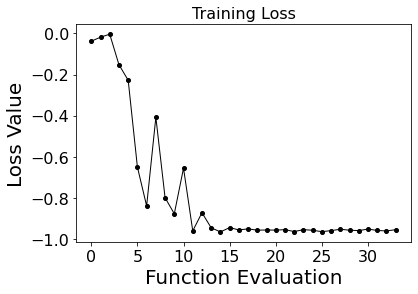

In [26]:
import scipy.optimize as sp

history=[]

result = sp.minimize(f, [pi/2, 0.], method='COBYLA', constraints={'type': 'ineq', 'fun': lambda x: 2. * pi - x})

fig = mpl.figure(figsize=(6, 4))
mpl.plot(history, 'ko-', markersize=4, linewidth=1)
mpl.title("Training Loss", fontsize=16)
mpl.xlabel("Function Evaluation",fontsize=20)
mpl.ylabel("Loss Value", fontsize=20)
mpl.xticks(fontsize=16)
mpl.yticks(fontsize=16)
mpl.show()